<div class="alert">  
    <center><h1><strong>Final Project: NLP Fake news detection</strong></h1></center>

## Summary
1. Loading the dataset
2. Exploring the dataset
3. Cleaning the data
4. Data visualization on the columns/rows
5. Preparing the features
   - 5.1. Preparing the statement column
   - 5.2. Preparing the subject(s) column
   - 5.3 Preparing the speaker column
   - 5.4 Preparing the speaker's job title column
   - 5.5 Preparing the venue column
6. Vectorizing the features
   - 6.1 Feature extraction on the statements column
   - 6.2 Feature extraction for the Subject's column.
   - 6.3 Feature extraction on the speaker´s job title column
   - 6.4 Feature extraction on the venue column
7. Building and training our Machine Learning models
   - Gaussian Naive Bayes
   - Multinomial Naive Bayes
   - Complement Naive Bayes
   - Bernoulli Naive Bayes
8. Model evaluation and comparison
9. Conclusions

<div class="alert alert-block alert-info">  
    <center><h2><strong>Analysis / exploration of the data set</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
<ul>
    <li>Load the dataset</li>
    <li>Analyze the chosen dataset and its properties</li>
    <li>Clean the data / remove null values</li>
    <li>Build some data visualizations on the columns/rows</li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://www.cs.ucsb.edu/~william/data/liar_dataset">https://www.cs.ucsb.edu/~william/data/liar_dataset</a>
   
</div>

In [101]:
#Importing the required libraries
import numpy as np
import pandas as pd

## 1. Loading the dataset

In [102]:
# Here we are loading th dataset into a pandas dataframe we can do further analysis on it
df = pd.read_csv("datasets/Liar_Dataset.csv")

# We are also going to look at the first 5 records in it so to have an idead on what we are working with
df.head(5)

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


## 2. Exploring the dataset

In [103]:
# Let us first take a look at what we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   [ID].json             12787 non-null  object
 1   label                 12787 non-null  object
 2   statement             12787 non-null  object
 3   subject(s)            12787 non-null  object
 4   speaker               12787 non-null  object
 5   speaker's job title   9221 non-null   object
 6   state info            10038 non-null  object
 7   party affiliation     12787 non-null  object
 8   barely true counts    12787 non-null  int64 
 9   false counts          12787 non-null  int64 
 10  half true counts      12787 non-null  int64 
 11  mostly true counts    12787 non-null  int64 
 12  pants on fire counts  12787 non-null  int64 
 13  venue                 12658 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning">  
<b>In the above we can point a few things about the dataset</b> 
<hr>
<ul>
    <li>1. It has 14 columns and 12787 rows</li>
    <li>2. It has two datatypes: objects (strings) and int64 (numbers) </li>
    <li>3. The first column - which seems to be some kind of ID - is actually a string. And we can see by looking at the data inside the CSV looks like the filename.</li>
    <li>4. We can also notice here that we have a few nulls, as for some columns (such as) 'speaker's job title ', 'state info' and 'venue' the Non-Null Counts are lower than the number of rows. </li>
</ul>
</div>

In [104]:
# Now take a look at the columns inside the dataset so to have an idea about the features we can use further in our model
df.columns

Index(['[ID].json', 'label', 'statement', 'subject(s)', 'speaker',
       'speaker's job title', 'state info', 'party affiliation',
       'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'venue'],
      dtype='object')

<div class="alert alert-block alert-warning">  
<b>Further description by matching the columns with the rows</b> 
<hr>
<ul>
    <li>1. '[ID].json' - As already stated, this seems to be a filename. This may not be an useful feature for us to use so we may delete it in the future.</li>
    <li>2. 'label' -  This column is the classification of the news statement, it can be either TRUE, FALSE, half-true, half-false or pants-fire.</li>
    <li>3. 'statement' - This represents the text in the news article. </li>
    <li>3. 'subject(s)' -   The subjects that the news statement talks about. We will further analyze what are them below. </li>
    <li>3. 'speaker' -  The person who talked/wrote about the news statement.  We will further analyze what are them below. </li>
    <li>4. 'speakers job title' -  The speaker's job.  We will further analyze what are them below. </li>
    <li>5. 'state info' -  The state where the statement was said.</li>
    <li>7. 'party affiliation' - The political party the speaker is related to. </li>
    <li>8. 'barely true counts' - The counts of statements that are classified as being barely true. Meaning ??? </li>
    <li>9. 'false counts' - The counts of statements that are classified as being barely false </li>
    <li>10. 'half true counts' -  The counts of statements that are classified as being half true. Meaning ??? </li>
    <li>11. 'mostly true counts' -  The counts of statements that are classified as being mostly true. Meaning ??? </li>
    <li>12. 'pants on fire counts' -  The counts of statements that are classified as being pants on fire. Meaning ??? </li>
    <li>13. 'venue' - The "place" where the statement was said. It could be a radio station, a blog or any other media venue. </li>
</ul>
</div>

## 3. Cleaning the data

In [105]:
# We already noticed above that we have some null values. Now let us confirm how many and in which columns
df.isnull().sum()

[ID].json                  0
label                      0
statement                  0
subject(s)                 0
speaker                    0
speaker's job title     3566
state info              2749
party affiliation          0
barely true counts         0
false counts               0
half true counts           0
mostly true counts         0
pants on fire counts       0
venue                    129
dtype: int64

In [106]:
np.sum(df.isnull().any(axis=1))

np.int64(4354)

<div class="alert alert-block alert-warning">  
<b>In the above we can see that:</b> 
<hr>
<ul>
    <li>1. We have 3565 nulls in the speaker's job title column, 2747 nulls in the state info column, and 129 nulls in the venue column.</li>
    <li>2. In total we have 4351 nulls</li>
    <li>3. We can also see by analysing the rows that we have two kids of nulls when the value is missing: NaN and tje np.nan return type.</li>
</ul>
<h3>Below we will apply some strategies to clean these nulls in order to not mess with our analysis.</h3>
</div>

In [107]:
# Here we are re replacing the rows with NaN (null) values with a blank space
df.replace('', np.nan, inplace=True)

# Now we are going to replace the np.nan values for all the three columns we are cleaning
df["speaker's job title"]= df["speaker's job title"].replace(np.nan, 'Unknown')
df['venue']= df['venue'].replace(np.nan, 'Unknown')
df["state info"]= df["state info"].replace(np.nan, 'Unknown')

In [108]:
# Now let us check again if we were able to completely remove the nulls
df.isnull().sum()

[ID].json               0
label                   0
statement               0
subject(s)              0
speaker                 0
speaker's job title     0
state info              0
party affiliation       0
barely true counts      0
false counts            0
half true counts        0
mostly true counts      0
pants on fire counts    0
venue                   0
dtype: int64

In [109]:
# We can also remove th [ID].json column, since it is not useful to us
df.drop(columns=['[ID].json'], axis=1, inplace=True)

## 4. Data visualization on the rows

<div class="alert alert-block alert-warning">  
<b>Below we are going to try to understand more about the rows we have so to start reasoning about which information we have in them and which of them we can use later to extract the features for our Machine Learning models.</b> 
<hr>
</div>

In [110]:
# Defining some helper functions and variables for generating the visualizations using matplotlib, wordcloud and seaborn
from matplotlib import pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns

top10 = 10


# Plots a pie graph based on a specific column
def plot_pie(column, number_of_values):
    df[column].value_counts().head(number_of_values).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

def plot_bar(column, number_of_values):
    df[column].value_counts().value_counts().head(number_of_values).plot(x='lab', y='val', rot=0)

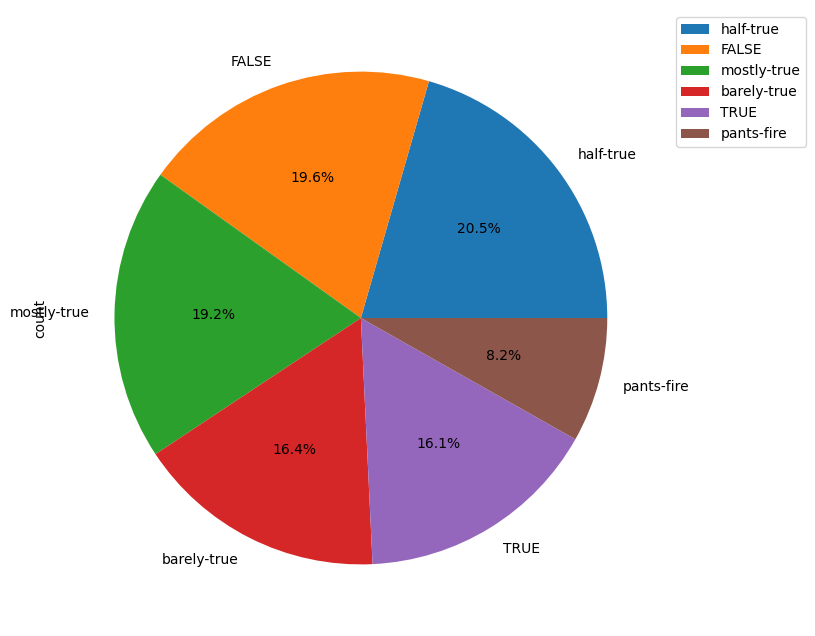

In [111]:
# Plotting a pie graph based on the label column
plot_pie('label', top10)

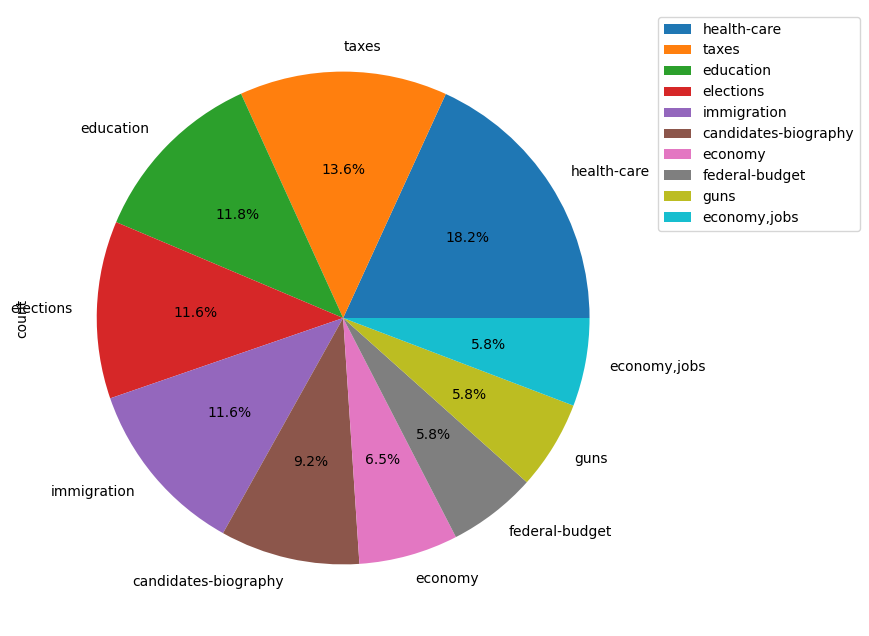

In [112]:
# Plotting a pie graph based on the subjects column
plot_pie('subject(s)', top10)

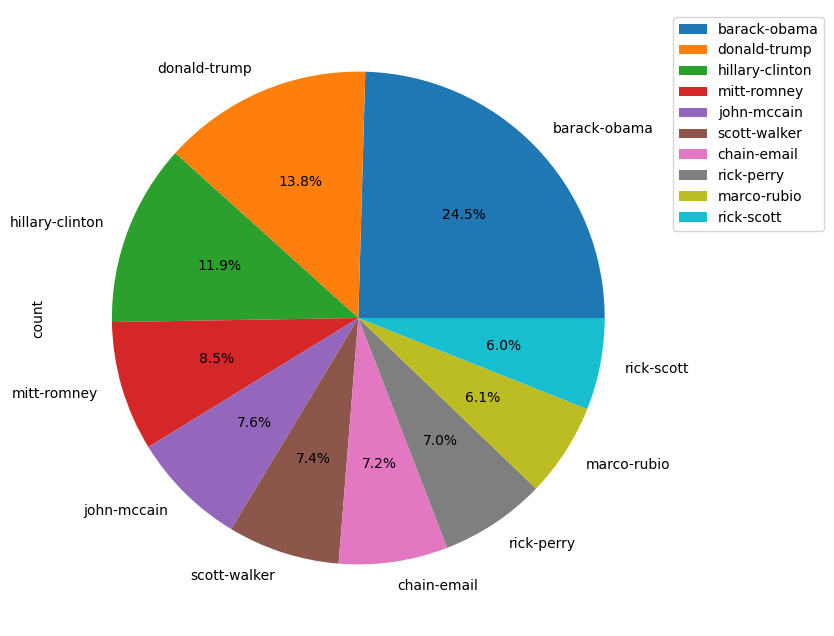

In [113]:
# Plotting a pie graph based on the subjects speakers
plot_pie('speaker', top10)

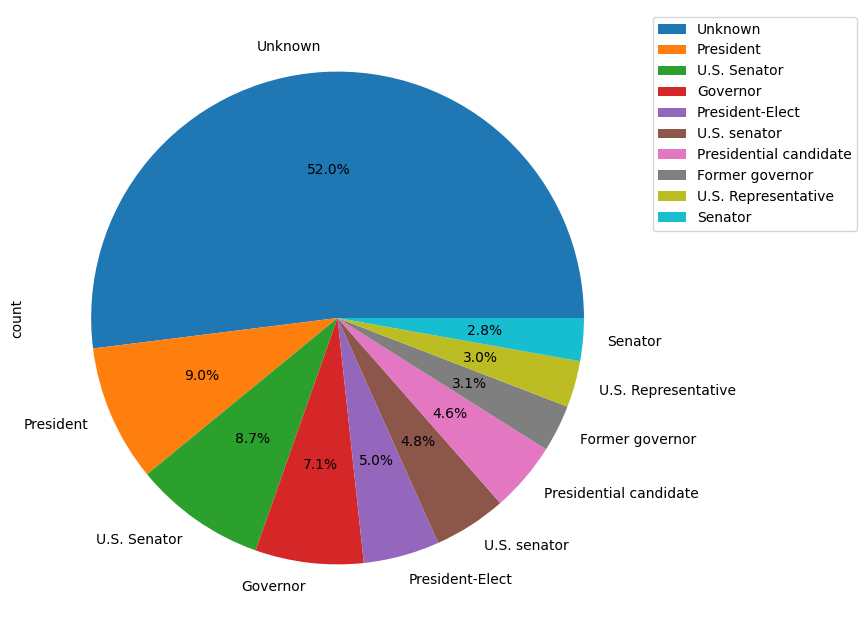

In [114]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("speaker's job title", top10)

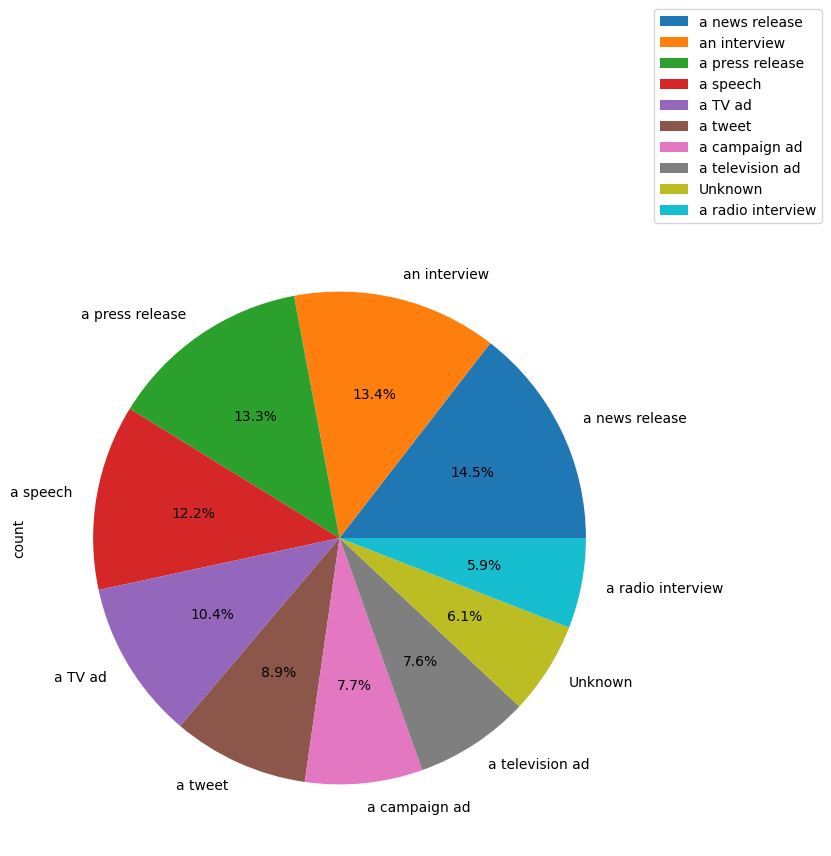

In [115]:
# Plotting a pie graph based on the venue
plot_pie("venue", top10)

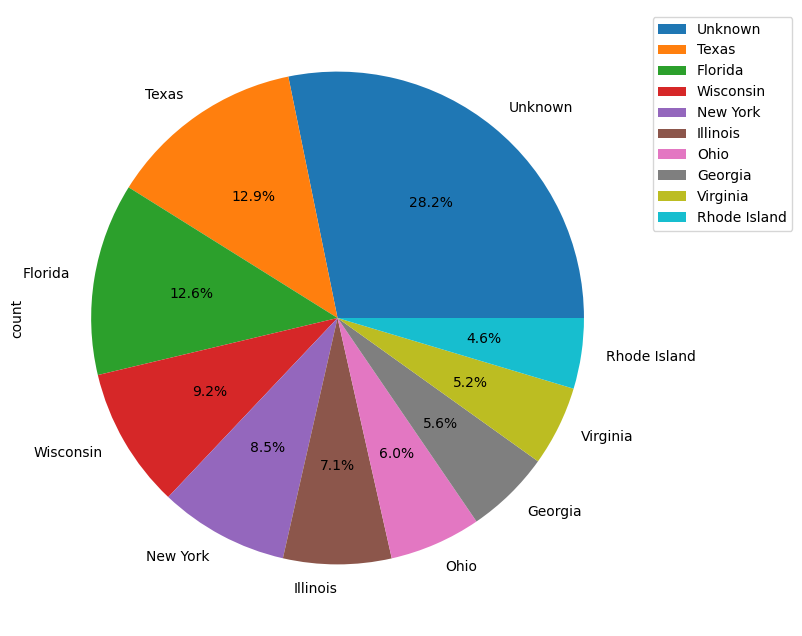

In [116]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("state info", top10)

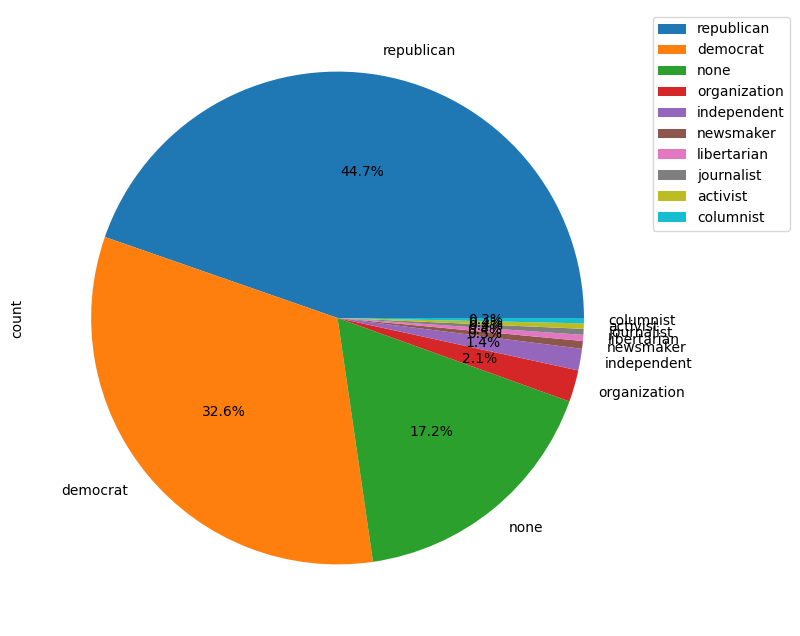

In [117]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("party affiliation", top10)

<div class="alert alert-block alert-warning">  
<b>Based on the above pie charts we can already draw some interesting conclusions:</b> 
<hr>
<ul>
<li>1. For the <b>'label'</b> column, which defines the category to which the news articles belong to, we can see that our dataset contains mostly half-true statements (19.6% of the overall). On the opposite, lower end we have 8.2% pants-fire statements. </li>
<li>2. As for the subjects in the dataset, we see 10 of them, being (in order of distribution of statements, from higher to lower):
 a. Health-care
 b. education
 c. elections
 d. immigration
 c. candidates-biography
 d. economy </li>
<li>3. As for the <b>job titles</b> of the speakers in the dataset (the person who wrote/spoke the news article) we have them being:
 a. Unknown - the articles we had no data for speaker
 b. President
 c. U.S. Senator
 d. Governor
 e. President-Elect (This is a duplicate, we will deal with it in the future)
 f. U.S. Senator (This is a duplicate, we will deal with it in the future)
 e. Presidential Candidate </li>
<li>
4. As per the <b>venue</b> column, meaning the source of the news article, we have:
 a. 18% of them come from a news release.
 b. 16.7% of them come from an interview.
 c. 16.5 come from a press release.
 d. 15.1% of them come from a speech.
 e. 13.0% come from a TV ad.
 f. 11.1% of them come from a tweet.
 e. 9.6% of them come from a campaign ad.</li>
<li>
5. As per the <b>state info</b> where the news was released, we have:
 a. Unknown
 b. Texas
 c. Florida
 d. Wisconsin
 e. New York
 f. Illinois
 g. Ohio</li>
<li>
6. And at last, for the <b>party affiliation</b> we have:
 a. 45%.2 of the political parties affiliated to the news articles are republicans.
 b. We have also a big number of articles affiliated with democrats and 17.$ are unknowns.
 c. We have also a small number of articles being related to no party affiliations, libertarians, a few of them being independent, affiliated to organizations or newsmakers.
</li>
</ul>
</div>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Identification of suitable features and implementation of a suitable feature extractor, e.f.
TfidfVectorizer</strong></h2></center>

## 5. Preparing the features

<div class="alert alert-block alert-warning">  
<b>Below we are going to prepare the features we are going to use with a few techniques in order to prepare the data so that we can further fit our model into it.</b>

<ul>
<li>1. We will remove the stopwords for the news statements, so to not overfit our model due to these words not being useful for us.</li>
<li>2. We will remove special characters.</li>
<li>3. We will gather and remove words that are repeated.</li>
<li>4. We will transform the string texts in tokens (tokenization) so that we can later vectorize them so to fit our model.</li>
<li>5. We will apply stemming to the words in the words so to remove common suffixes from the end of word tokens.</li>
</li>6. At last we will apply lemmatization to ensure that the output word is an existing normalized word.</li>
</ul>
<hr>
</div>

### 5.1 Preparing the statement column

In [118]:
# Let us first define some helper functions that will allow us to prepare the data
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

''' 
Removes stopwords that are included in the english stopwords corpus.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_stopwords(column):
    stopwords_list = stopwords.words('english')
    return column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))


''' 
Removes all the ASCII code special characters !@#$%^&*()_+{}/ from each row in the dataframe column.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_special_characters(column):
    # Using regex to remove every non word character
    return column.map(lambda x: re.sub(r'\W+', ' ', x))


''' 
Removes duplicated words in the dataframe column.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_repeated_words(column):
    ''' 
    Adds all the words in a string sentence as unique words in a set.
    
    Parameters:
    - text(String): A string value representing the sentence to be processed
    
    Returns:
    - text(String): The processed sentence
    '''
    def remove_duplicates(text):
        words = text.split()
        seen = set()
        unique_words = []
        for word in words:
            if word not in seen:
                unique_words.append(word)
                seen.add(word)
        return ' '.join(unique_words)

    return column.apply(remove_duplicates)


''' 
Tokenizes the words in the rows belonging to the dataframe column using word_tokenize. 

Parameters:
- column(pd.Dataframe): The dataframe column to be processed

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def tokenize(column):
    return column.apply(word_tokenize)


''' 
Applies stemming to the rows belonging to the dataframe column using the Porter Stemmer technique.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def apply_stemming(column):
    stemmer = PorterStemmer()
    return column.apply(lambda x : [stemmer.stem(y) for y in x])

''' 
Applies lemmatization to the rows belonging to the dataframe column. using WordNetLemmatizer

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def apply_lemmatization(column):
    lemmatizer = WordNetLemmatizer()

    def lemmatize_text(text):
        if isinstance(text, str):
            words = word_tokenize(text)
            lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
            return ' '.join(lemmatized_words)
        else:
            return text

    return column.apply(lemmatize_text)
    
# Uncomment the below for debugging
# # df["statement"] = remove_stopwords(df["statement"])
# # df["statement"] = remove_special_characters(df["statement"])
# # df["statement"] = remove_repeated_words(df["statement"])
# # df["statement"] = tokenize(df["statement"])
# # df["statement"] = apply_stemming(df["statement"])
# # df["statement"] = apply_lemmatization(df["statement"])
# # df["statement"].head()

[nltk_data] Downloading package stopwords to /Users/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/lucas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [119]:
# Preparing the statement column

# Uncomment the below for debugging
# df = pd.read_csv("datasets/Liar_Dataset.csv")

df["statement"] = remove_stopwords(df["statement"])
df["statement"] = remove_special_characters(df["statement"])
df["statement"] = remove_repeated_words(df["statement"])
df["statement"] = tokenize(df["statement"])
df["statement"] = apply_stemming(df["statement"])
df["statement"] = apply_lemmatization(df["statement"])
df["statement"].head(5)

0    [build, wall, u, s, mexico, border, take, lite...
1       [wisconsin, pace, doubl, number, layoff, year]
2           [say, john, mccain, done, noth, help, vet]
3    [suzann, bonamici, support, plan, cut, choic, ...
4    [when, ask, report, whether, he, center, crimi...
Name: statement, dtype: object

### 5.2. Preparing the subject(s) column

In [120]:
# Let us define some helper functions to allow us to prepare the subject(s) column
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import pandas as pd
from fuzzywuzzy import fuzz

''' 
Uses the fuzzywuzy library to group similar words together on a similarity threshold.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def group_by_similar_lists(column, threshold=80):
    unique_values = column.dropna().unique()
    groups = {}

    # Convert list of strings to a single string for comparison
    def list_to_string(lst):
        return ''.join(lst)

    # Iterate through each unique value (list of strings) and assign it to a group
    for value in unique_values:
        found_group = False
        str_value = list_to_string(value)
        
        for group in groups:
            # If the value is similar to the representative value of the group, add it to the group
            if fuzz.ratio(str_value, group) > threshold:
                groups[group].append(value)
                found_group = True
                break
        
        # If no similar group was found, create a new group
        if not found_group:
            groups[str_value] = [value]

    # Map each original value to its corresponding group
    def map_to_group(value):
        str_value = list_to_string(value)
        for group, group_values in groups.items():
            if any(fuzz.ratio(str_value, list_to_string(existing_value)) > threshold for existing_value in group_values):
                return group
        return str_value

    return column.apply(map_to_group)

In [121]:
# Uncomment the below for debugging. Do not forget to comment again so to not mess with our data samples!
# df = pd.read_csv("datasets/Liar_Dataset.csv")

df["subject(s)"] = remove_stopwords(df["subject(s)"])
df["subject(s)"] = remove_special_characters(df["subject(s)"])
df["subject(s)"] = remove_repeated_words(df["subject(s)"])

df["subject(s)"].value_counts()

subject(s)
health care                                        474
taxes                                              356
education                                          309
elections                                          304
immigration                                        303
                                                  ... 
agriculture veterans                                 1
bush administration job accomplishments pundits      1
health care medicare social security                 1
ethics health care public state budget finances      1
candidates biography infrastructure                  1
Name: count, Length: 4533, dtype: int64

In [122]:
# By checking the above, we can see that after removing the stopwords, special characters and repeated words from each row in the subject(s) column we are left with
# 4533 unique values. Let us try to group similar values so to not overfit our model with unneeded information.

df["subject(s)"] = group_by_similar_lists(df["subject(s)"])

df["subject(s)"].value_counts()

subject(s)
health care                                                                                        509
candidates biography state budget                                                                  411
taxes                                                                                              356
education                                                                                          309
immigration                                                                                        306
                                                                                                  ... 
debt weather                                                                                         1
abortion families federal budget state                                                               1
civil rights consumer safety corporations government regulation health care legal issues public      1
baseball deficit                                              

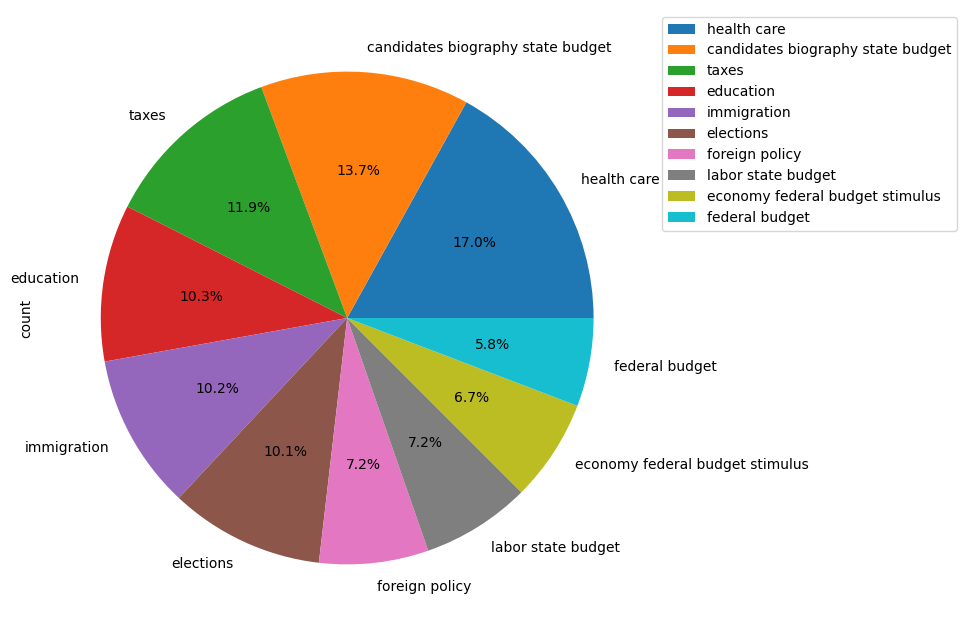

In [123]:
# now let us plot the top 10 values in our subject(s) list
plot_pie("subject(s)", 10)

### 5.3 Preparing the speaker column

In [124]:
# Let us see how many speakers we have. 3308
df['speaker'].value_counts()

speaker
barack-obama                 611
donald-trump                 343
hillary-clinton              297
mitt-romney                  212
john-mccain                  189
                            ... 
mike-hymes                     1
dana-wachs                     1
amalgamated-transit-union      1
d-king                         1
sal-esquivel                   1
Name: count, Length: 3308, dtype: int64

In [125]:
# Now let us remove the stopwords, remove special characters and repeated words and group by.

df['speaker'] = remove_stopwords(df['speaker'])
df['speaker'] = remove_special_characters(df['speaker'])
df['speaker'] = remove_repeated_words(df['speaker'])
df['speaker'] = group_by_similar_lists(df['speaker'])

# Now we ended up with 3120 values.
df['speaker'].value_counts()

speaker
barack obama                            611
donald trump                            345
hillary clinton                         338
mitt romney                             212
john mccain                             189
                                       ... 
committee restore americas greatness      1
virginia first foundation                 1
kevin flynn                               1
get equal texas                           1
sal esquivel                              1
Name: count, Length: 3123, dtype: int64

### 5.4 Preparing the speaker's job title column

In [126]:
# Let us see how many values we have here in our speaker's job title column. We have 1355 values, 
# let us try to apply our pipeline in order to reduce its dimensionality and remove unneeded words.
df["speaker's job title"].value_counts()

speaker's job title
Unknown                                                                  3567
President                                                                 615
U.S. Senator                                                              595
Governor                                                                  487
President-Elect                                                           343
                                                                         ... 
Associate director of the Rhode Island Division of Planning                 1
Communications Director, Georgia Democratic Party                           1
Executive director of the National Alliance on Mental Illness in Ohio       1
Chief Justice, Supreme Court of Georgia                                     1
Director, Center for Higher Education, Texas Public Policy Foundation       1
Name: count, Length: 1354, dtype: int64

In [127]:
# Helper functions for the speaker's job title

def tokenize_column(column):
    column = column.apply(str)
    tokens = []
    for word in column:
        tokens.append(word_tokenize(word))

    return tokens;

def remove_stopwords_from_speakers_job_title(speakers_job_title_list):
    return [
        [word for word in word_list if word.lower() not in stopwords.words('english')]
        for word_list in speakers_job_title_list
    ]

def apply_stemming_to_speakers_job_title(df, column_name, speakers_token):
    ps = PorterStemmer() 

    index = 0    
    for words in speakers_token:
    
        job=""
        for w in words: 
            job=job+ps.stem(w)+" "
        df.at[index, column_name] = job
        index += 1
    return df[column_name]


# Uncomment below to debug.
'''
df = pd.read_csv("datasets/Liar_Dataset.csv")

speakers_token = tokenize_column(df["speaker's job title"])
speakers_token = remove_stopwords_from_speakers_job_title(speakers_token)

df["speaker's job title"] = apply_stemming_to_speakers_job_title(df, "speaker's job title", speakers_token)
df["speaker's job title"] = group_by_similar_lists(df["speaker's job title"])

df["speaker's job title"].head(10)
df["speaker's job title"].value_counts().head(12).plot(kind='bar')
'''

'\ndf = pd.read_csv("datasets/Liar_Dataset.csv")\n\nspeakers_token = tokenize_column(df["speaker\'s job title"])\nspeakers_token = remove_stopwords_from_speakers_job_title(speakers_token)\n\ndf["speaker\'s job title"] = apply_stemming_to_speakers_job_title(df, "speaker\'s job title", speakers_token)\ndf["speaker\'s job title"] = group_by_similar_lists(df["speaker\'s job title"])\n\ndf["speaker\'s job title"].head(10)\ndf["speaker\'s job title"].value_counts().head(12).plot(kind=\'bar\')\n'

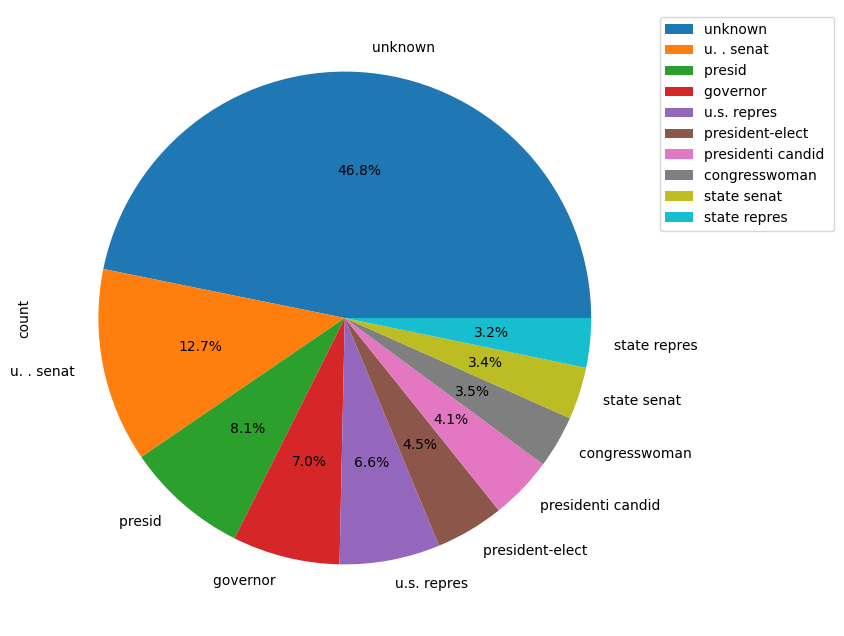

In [128]:
# Now let us apply the functions above to the column

speakers_token = tokenize_column(df["speaker's job title"])
speakers_token = remove_stopwords_from_speakers_job_title(speakers_token)

df["speaker's job title"] = apply_stemming_to_speakers_job_title(df, "speaker's job title", speakers_token)
df["speaker's job title"] = group_by_similar_lists(df["speaker's job title"])

plot_pie("speaker's job title", 10)

In [129]:
# Now let us count how many values we have:
df["speaker's job title"].value_counts()

speaker's job title
unknown                                      3567
u. . senat                                    970
presid                                        615
governor                                      537
u.s. repres                                   502
                                             ... 
associ director rhode island divis plan         1
commun director , georgia democrat parti        1
chief justic , suprem court georgia             1
baltimor raven lineback                         1
member hous representatinv                      1
Name: count, Length: 1049, dtype: int64

### 5.5 Preparing the venue column

In [130]:
df['venue'].value_counts()

venue
a news release                   309
an interview                     286
a press release                  282
a speech                         259
a TV ad                          222
                                ... 
a speech in Moscow                 1
a Tweet to PolitiFact Georgia      1
a Fox News debate                  1
in a speech in Orlando, Fla.       1
a speech on the economy            1
Name: count, Length: 5142, dtype: int64

In [131]:
# Defining some helper function for the venue column

def remove_stopwords_from_venue(speakers_job_title_list):
    return [
        [word for word in word_list if word.lower() not in stopwords.words('english')]
        for word_list in speakers_job_title_list
    ]

def apply_stemming_to_venue(df, column_name, tokens):
    ps = PorterStemmer() 

    index = 0    
    for words in tokens:
    
        job=""
        for w in words: 
            job=job+ps.stem(w)+" "
        df.at[index, column_name] = job
        index += 1
    return df[column_name]
    

# Uncomment below to debug.
'''
df = pd.read_csv("datasets/Liar_Dataset.csv")

venues_tokens = tokenize_column(df['venue'])
venues_tokens = remove_stopwords_from_venue(venues_tokens)

df['venue'] = apply_stemming_to_venue(df, 'venue', venues_tokens)

df['venue'].value_counts()
'''

'\ndf = pd.read_csv("datasets/Liar_Dataset.csv")\n\nvenues_tokens = tokenize_column(df[\'venue\'])\nvenues_tokens = remove_stopwords_from_venue(venues_tokens)\n\ndf[\'venue\'] = apply_stemming_to_venue(df, \'venue\', venues_tokens)\n\ndf[\'venue\'].value_counts()\n'

In [132]:
# Now let us apply tokenization remove the stopwords and apply stemming to the venue column.
venues_tokens = tokenize_column(df['venue'])
venues_tokens = remove_stopwords_from_venue(venues_tokens)

df['venue'] = apply_stemming_to_venue(df, 'venue', venues_tokens)

# Now we can see that we have 4591 values left in the column
df['venue'].value_counts()

venue
press releas                 331
news releas                  330
interview                    295
speech                       273
tv ad                        239
                            ... 
tweet politifact georgia       1
fox new debat                  1
book 'no apolog '              1
ralli temp , ariz .            1
speech economi                 1
Name: count, Length: 4590, dtype: int64

<div class="alert alert-block alert-info">  
    <center><h2><strong>Feature extraction</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>In this section we are going to convert the raw text data from our features into vectors that we can use later to feed our machine learning models. We are going
to do this using the TF-IDF (Term Frequency-Inverse Document Frequency) technique, Adjusts the word counts of each element based on their importance (frequency and inverse-frequency) across the entire dataseta.</b>
</div>

## 6. Feature extraction

In [133]:
# First let us define some helper functions for the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Let us instantiate our vectorizer using TF IDF vectorizer
word_vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        strip_accents='unicode',
        analyzer='word',
        token_pattern=r'\w{1,}',
        ngram_range=(3, 3),
        max_features =5000)

def vectorize_column(column):
    return word_vectorizer.fit_transform(column.astype('str'))

### 6.1 Feature extraction on the statements column

In [134]:
statements_vectors = vectorize_column(df['statement'])
statements_vectors = statements_vectors.toarray()

# Get output feature names for transformation.
output_feaature_names = word_vectorizer.get_feature_names_out(df['statement'])

statement_feature_df=pd.DataFrame(np.round(statements_vectors, 1), columns=output_feaature_names)
statement_feature_df.head()

,000 american die,000 american lose,000 campaign contribut,000 fewer job,000 floridian lost,000 job creat,000 job month,000 job state,000 job wisconsin,000 manufactur job,...,year tax return,year texa creat,year the u,year tripl 10,year u n,year u s,year unit state,you can not,you know what,young peopl color
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Adding the vectorized statement column to the dataframe
df = pd.concat([df, statement_feature_df], axis=1)

### 6.2 Feature extraction for the Subject's column.

In [136]:
subjects_vectors = vectorize_column(df["subject(s)"])
subjects_vectors = subjects_vectors.toarray()

# Get output feature names for transformation.
output_feature_names_subject = word_vectorizer.get_feature_names_out(df["subject(s)"])

subjects_feature_df=pd.DataFrame(np.round(subjects_vectors, 1), columns=output_feature_names_subject)
subjects_feature_df.head()

,10 news tampa,2012 10 news,2012 campaign advertising,2012 market regulation,2012 market stimulus,2012 military terrorism,2012 new hampshire,2012 occupy wall,2012 oil spill,2012 pensions state,...,voting record women,voting record workers,wall street poverty,wall street public,wall street religion,wall street taxes,wall street urban,wall street workers,wealth women workers,welfare women workers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.3 Feature extraction on the speaker´s job title column

In [137]:
speakers_job_title_vectors = vectorize_column(df["speaker's job title"])
speakers_job_title_vectors = speakers_job_title_vectors.toarray()

# Get output feature names for transformation.
output_feature_names_speakers_job_title = word_vectorizer.get_feature_names_out(df["speaker's job title"])

speakers_job_title_feature_df=pd.DataFrame(np.round(speakers_job_title_vectors, 1), columns=output_feature_names_speakers_job_title)
speakers_job_title_feature_df.head()

,1 austin s,12 member tampa,12th congression district,1851 center constitut,1st congression district,2 texa suprem,29th congression district,2nd district arkansa,30th legisl district,4 educ group,...,world new america,worthington board educ,writer glenn beck,writer grit breakfast,writer new yorker,writer weekli standard,wtmj am milwauke,york citi mayor,york time columnist,yorker legal analyst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.4 Feature extraction on the party affiliation column

In [138]:
party_affiliation_vectors = vectorize_column(df["party affiliation"])
party_affiliation_vectors = party_affiliation_vectors.toarray()

# Get output feature names for transformation.
output_feature_names_party_affiliation = word_vectorizer.get_feature_names_out(df["party affiliation"])

party_affiliation_feature_df=pd.DataFrame(np.round(party_affiliation_vectors, 1), columns=output_feature_names_party_affiliation)
party_affiliation_feature_df.head()

,democratic farmer labor,liberal party canada,ocean state tea,state tea party,talk show host,tea party action,tea party member
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.5 Feature extraction on the venue column

In [139]:
venue_vectors = vectorize_column(df["venue"])
venue_vectors = venue_vectors.toarray()

# Get output feature names for transformation.
output_feature_names_venue = word_vectorizer.get_feature_names_out(df["venue"])

venue_feature_df=pd.DataFrame(np.round(venue_vectors, 1), columns=output_feature_names_venue)
venue_feature_df.head()

,1 2011 new,1 austin s,1 radio interview,10 kendrick meek,10 new confer,101 5 ask,101 5 fm,101 5 s,10th hous district,1104 lorain ohio,...,york time column,york time magazin,york time news,york time op,young republican tampa,youtub attack ad,youtub campaign announc,youtub celebr bethani,youtub debat charleston,youtub radio address
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.6 Adding the features to the dataframe so we can feed them to our model

In [140]:
speaker_vectors = pd.Categorical(df['speaker'])               
df['speaker']=speaker_vectors.codes

label_vectors = pd.Categorical(df['label'])               
df['label']=label_vectors.codes

state_info_vectors = pd.Categorical(df['state info'])               
df['state info']=state_info_vectors.codes

subjects_info_vectors = pd.Categorical(df["subject(s)"])               
df["subject(s)"]=subjects_info_vectors.codes

speakers_job_title_info_vectors = pd.Categorical(df["speaker's job title"])               
df["speaker's job title"]=speakers_job_title_info_vectors.codes

party_affiliation_info_vectors = pd.Categorical(df["party affiliation"])               
df["party affiliation"]=party_affiliation_info_vectors.codes

venue_info_vectors = pd.Categorical(df["venue"])               
df["venue"]=venue_info_vectors.codes

# I am going to drop the statement column because it has too many rows and it is making our models too slow
df.drop(columns=['statement'], axis=1, inplace=True)

# Let us check the dataframe now with all the features already vectorized
df.head(50)

,label,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,...,year tax return,year texa creat,year the u,year tripl 10,year u n,year u s,year unit state,you can not,you know what,young peopl color
0,1,1562,2491,429,62,20,30,30,42,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1623,1654,946,79,6,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1711,821,774,42,20,63,114,51,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1687,2503,250,48,20,1,1,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,290,2741,1014,79,6,5,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1329,343,1014,53,20,1,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,774,2738,188,60,17,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2,1111,1466,913,46,20,13,22,11,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1405,2673,241,42,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2,1368,2067,429,22,20,8,10,12,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-info">  
    <center><h2><strong>Building and evaluation our models</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>In this section we are going to build and train our machine learning models and use K Fold cross validation for model comparison. Here we chose to use the four different implementations of the Naive Bayes algorithm, being them: Gaussian NB, Multinomial NB, Complement NB and Bernoulli´s NB. We chose to go for the Naive approach to understand their differences and compare them between each other so to evaluate which one would perform better against our dataset. We are also going to use KFold cross-validation in order to split our test and train data within 5 iterations.</b>
</div>

## 7. Machine Learning models

In [141]:
# Let us define some helper variables and functions in order to better evaluate our models

# Importing the necessary libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Global variables
kfold_splits_5 = 5

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import CategoricalNB
import time

# Function to train and evaluate the model on a given fold
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model and measure the time taken
    print('Running time of algorithm')
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    print(f"Elapsed time: {elapsed_time:.4f} seconds")
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Generate classification report
    classification_rep = classification_report(y_test, predictions)
    
    # Generate confusion matrix
    confusion_mat = confusion_matrix(y_test, predictions)
    
    return accuracy, classification_rep, confusion_mat

# Function to perform K-Fold cross-validation
def k_fold_cross_validation(model, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits)
    outcomes = []
    conf_matrix_list = []
    
    for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        print(f"KFold Split: {fold}")
        print(f"Train indices: {train_index}")
        print(f"Test indices: {test_index}\n")
        
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train and evaluate the model
        accuracy, classification_rep, confusion_mat = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        
        outcomes.append(accuracy)
        conf_matrix_list.append(confusion_mat)
        
        print(f"Accuracy of KFold {fold} is: {accuracy}\n")
        print(f"Classification Report of KFold {fold} is following:\n")
        print(classification_rep)
        print(f"Confusion Matrix of KFold {fold} is following:\n")
        print(confusion_mat)
        print('\n' + '='*50 + '\n')
    
    return outcomes, conf_matrix_list

# Function to print the overall results
def print_final_results(outcomes, conf_matrix_list):
    mean_accuracy = np.mean(outcomes)
    print(f"Total Average Accuracy of Categorical Naive Bayes is: {mean_accuracy:.4f}")
    print("\nAverage Confusion Matrix:\n")
    avg_conf_matrix = np.mean(conf_matrix_list, axis=0)
    print(avg_conf_matrix)

### 7.1 Gaussian Naive Bayes

#### Below we will implement the Gaussian Naive Bayes algorithm, which is applies the Naive Bayes theorem specifically tailored for continuous data, within the assumption that the data follows a normal distribution. This algorithm is particularly well-suited for tasks where the features are continuous and the assumption of normality is reasonable. Let us see how it performs against our dataset.

In [142]:
gaussian_nb = GaussianNB(var_smoothing=1e-08)

# Split features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df['label'].values      # Target labels

# Perform K-Fold cross-validation
results_gaussian_nb, conf_matrix_list_gaussian_nb = k_fold_cross_validation(gaussian_nb, X, y, kfold_splits_5)

# Print the final results
print_final_results(results_gaussian_nb, conf_matrix_list_gaussian_nb)

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12784 12785 12786]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
Elapsed time: 0.3241 seconds
Accuracy of KFold 1 is: 0.9960906958561376

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       515
           1       1.00      0.98      0.99       414
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       500
           5       0.99      0.99      0.99       197

    accuracy                           1.00      2558
   macro avg       1.00      1.00      1.00      2558
weighted avg       1.00      1.00      1.00      2558

Confusion Matrix of KFold 1 is following:

[[515   0   0   0   0   0]
 [  7 407   0   0   0   0]
 [  0   0 401   0   0   0]
 [  0   0   0 531   0   0]
 [  0   0   0   0 499   1]
 [  0   0

### 7.2 Multinomial Naive Bayes

<div class="alert alert-block alert-warning">  
<b>Below we will implement a model using the Multinomial Naive Bayes approach, which is a variant of the Naive Bayes approach specifically designed for classification problems where the features are discrete and typically represent counts or frequencies.</b>
</div>

In [143]:
multinomial_nb = MultinomialNB()

# Split features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df['label'].values      # Target labels

# Perform K-Fold cross-validation
results_multinomial_nb, conf_matrix_list_multinomial_nb = k_fold_cross_validation(multinomial_nb, X, y, kfold_splits_5)

# Print the final results
print_final_results(results_multinomial_nb, conf_matrix_list_multinomial_nb)

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12784 12785 12786]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
Elapsed time: 0.0297 seconds
Accuracy of KFold 1 is: 0.19937451133698203

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       1.00      0.07      0.13       515
           1       0.20      0.42      0.27       414
           2       0.17      0.35      0.23       401
           3       0.22      0.07      0.10       531
           4       0.34      0.10      0.15       500
           5       0.15      0.38      0.22       197

    accuracy                           0.20      2558
   macro avg       0.35      0.23      0.18      2558
weighted avg       0.38      0.20      0.17      2558

Confusion Matrix of KFold 1 is following:

[[ 35 161 176  31  14  98]
 [  0 173 129  22  27  63]
 [  0 136 142  23  14  86]
 [  0 201 169  35  35  91]
 [  0 157 168  40  50  85]
 [  0  5

### 7.3 Complement Naive Bayes

<div class="alert alert-block alert-warning">  
<b>Here we will implement Complement Naive Bayes, which is a variant of the Multinomial Naive Bayes algorithm specifically designed to work on some of the limitations of the latter, particularly in dealing with imbalanced datasets and improving classification performance. It improves classification accuracy by estimating probabilities using the complement of each class Let us see how it works against our dataset.</b>
</div>

In [144]:
complement_nb = ComplementNB()

# Split features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df['label'].values      # Target labels

# Perform K-Fold cross-validation
results_complement_nb, conf_matrix_list_complement_nb = k_fold_cross_validation(complement_nb, X, y, kfold_splits_5)

# Print the final results
print_final_results(results_complement_nb, conf_matrix_list_complement_nb)

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12784 12785 12786]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
Elapsed time: 0.0385 seconds
Accuracy of KFold 1 is: 0.19898358092259577

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       0.35      0.08      0.13       515
           1       0.19      0.40      0.25       414
           2       0.16      0.33      0.22       401
           3       0.21      0.08      0.11       531
           4       0.32      0.13      0.18       500
           5       0.19      0.33      0.24       197

    accuracy                           0.20      2558
   macro avg       0.24      0.22      0.19      2558
weighted avg       0.25      0.20      0.18      2558

Confusion Matrix of KFold 1 is following:

[[ 41 160 177  45  23  69]
 [ 14 164 133  24  38  41]
 [ 22 138 134  26  20  61]
 [ 20 202 163  41  51  54]
 [ 15 158 166  43  64  54]
 [  5  5

### 7.4 Bernoulli Naive Bayes

<div class="alert alert-block alert-warning">  
<b>Below we will implement Bernoulli Naive Bayes, which was created mostly for boolean feature datasets where each feature can take on only two possible values, either 0 or 1. It is particularly useful in situations like text classification, where features might represent the presence or absence of a word in a document so it might not perform that well in our case, but since we are comparing all the Naive Bayes approach let us see how it performs.</b>
</div>

In [145]:
bernoulli_nb = BernoulliNB()

# Split features and labels
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df['label'].values      # Target labels

# Perform K-Fold cross-validation
results_bernoulli_nb, conf_matrix_list_bernoulli_nb = k_fold_cross_validation(bernoulli_nb, X, y, kfold_splits_5)

# Print the final results
print_final_results(results_bernoulli_nb, conf_matrix_list_bernoulli_nb)

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12784 12785 12786]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
Elapsed time: 0.1379 seconds
Accuracy of KFold 1 is: 0.5340109460516028

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       0.46      0.25      0.33       414
           2       0.52      0.36      0.42       401
           3       0.36      0.69      0.47       531
           4       0.46      0.45      0.46       500
           5       0.42      0.05      0.09       197

    accuracy                           0.53      2558
   macro avg       0.54      0.47      0.46      2558
weighted avg       0.55      0.53      0.51      2558

Confusion Matrix of KFold 1 is following:

[[515   0   0   0   0   0]
 [  0 105  35 188  84   2]
 [  0  17 144 175  63   2]
 [  0  25  39 365  96   6]
 [  0  28  37 204 227   4]
 [  0  52

### 8. Model evaluation and comparison

<div class="alert alert-block alert-warning">  
<b>In this section we will build graphs to compare the different ML models we implemented above to see which ones performed better.</b>
</div>

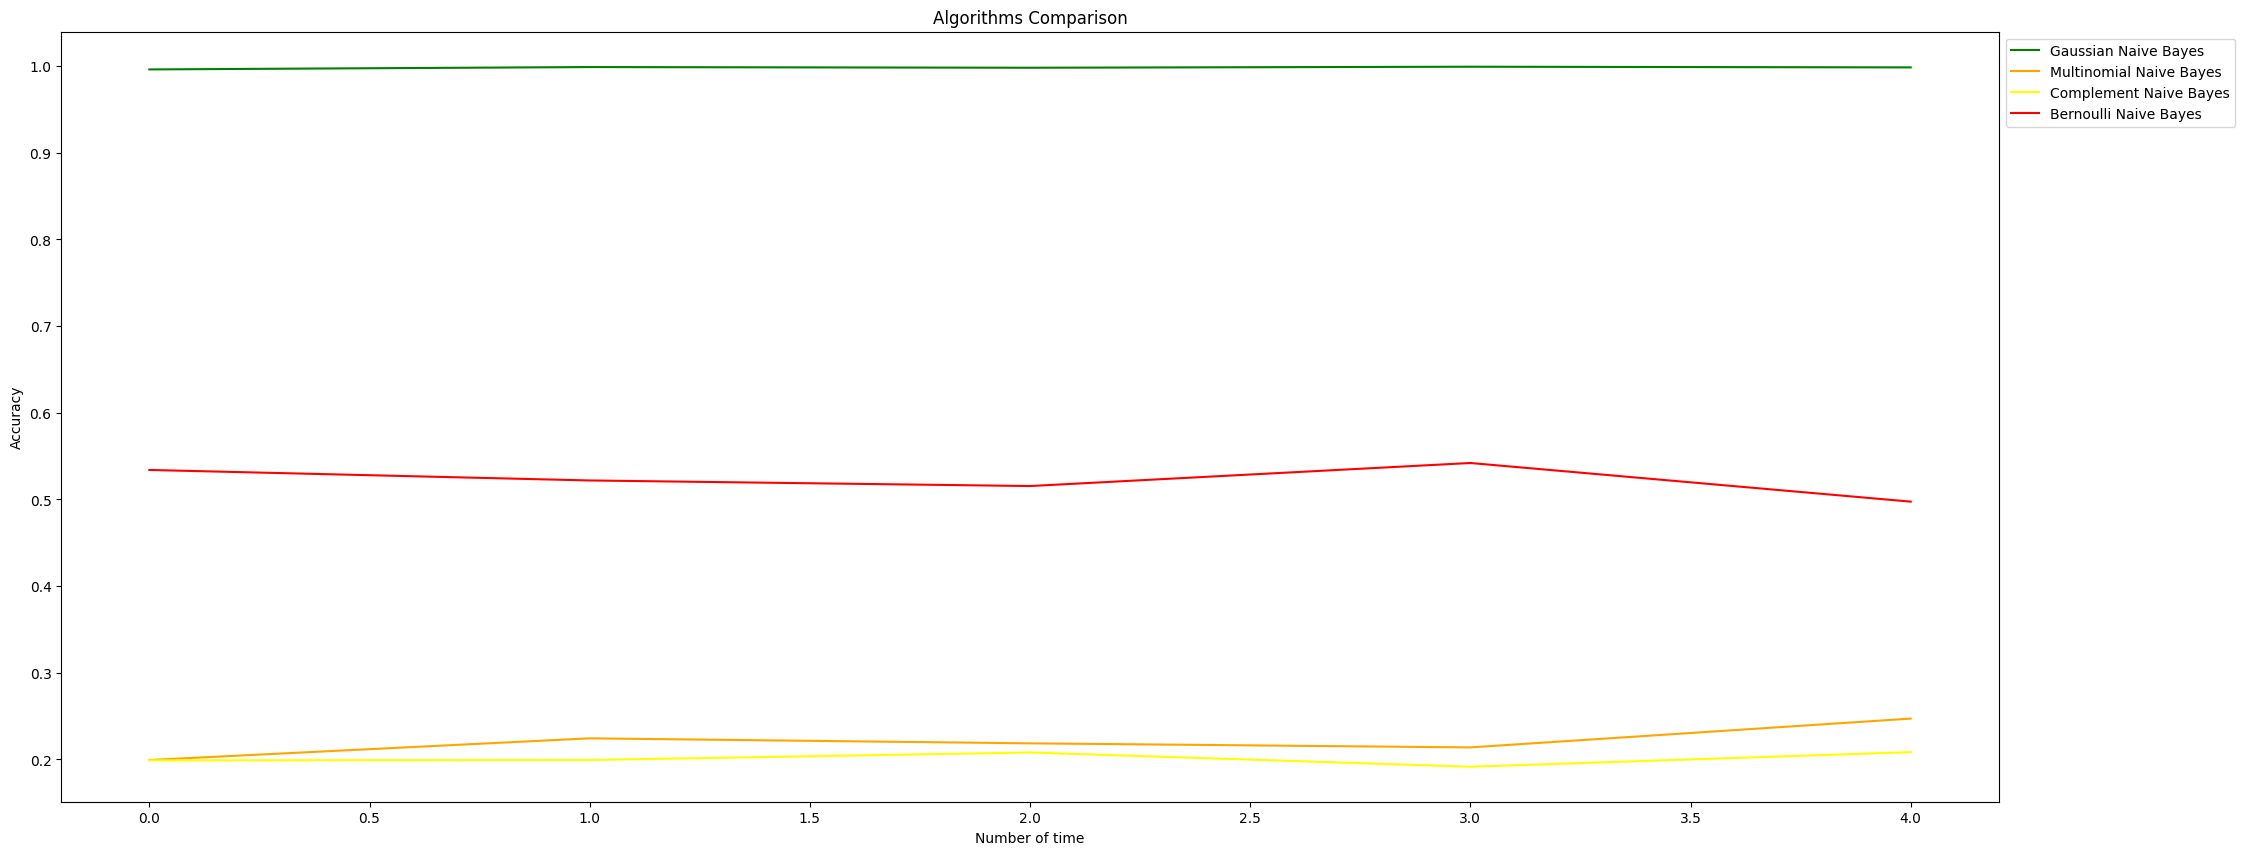

In [146]:
comparison_df=pd.DataFrame()
comparison_df['gaussian_nb']=results_gaussian_nb
comparison_df['multinomial_nb']=results_multinomial_nb
comparison_df['complement_nb']=results_complement_nb
comparison_df['results_bernoulli_nb']=results_bernoulli_nb

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)
plt.plot(comparison_df.gaussian_nb.values,color='green',label='Gaussian Naive Bayes')
plt.plot(comparison_df.multinomial_nb.values,color='orange',label='Multinomial Naive Bayes')
plt.plot(comparison_df.complement_nb.values,color='yellow',label='Complement Naive Bayes')
plt.plot(comparison_df.results_bernoulli_nb.values,color='red',label='Bernoulli Naive Bayes')
plt.title('Algorithms Comparison')
plt.xlabel('Number of time')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [147]:
comparison_df

,gaussian_nb,multinomial_nb,complement_nb,results_bernoulli_nb
0,0.996091,0.199375,0.198984,0.534011
1,0.998827,0.224394,0.199375,0.521892
2,0.998045,0.218616,0.208056,0.515448
3,0.999218,0.213923,0.191631,0.542041
4,0.998436,0.247165,0.208447,0.497458


# 9. Conclusions

By analysing the charts above we can see that the Gaussian Naive Bayes algorithm performed better, having almost 100% of accuracy on all of the iterations of our cross-validation. This could be due to a multitude of reasons, being them:

### 1. **Feature Distribution**:
   - **Gaussian Naive Bayes** assumes that the features (variables) follow a normal (Gaussian) distribution. Due to the nature of our dataset (real world political statements with a lot of detailed information) it makes sense that it follows a Gaussian distribution since the Central Limit Theorem suggests that the sum of independent random variables tend towards a Gaussian distribution. GNB is likely to perform better because its underlying assumption closely matches the data's true distribution.
   - **Multinomial Naive Bayes** is typically used for features representing discrete counts (e.g., word frequencies in text data). 
   - **Bernoulli Naive Bayes** assumes binary or boolean features, where each feature represents the presence or absence of something (e.g., a word in a document). Since our data isn’t binary, it makes sense that this model will not have a good performance.
   - **Complement Naive Bayes** is an adaptation of MNB for imbalanced datasets. It's also suitable for count-based data so it makes sense our model will not perform well because our features are not counts or frequencies.

### 2. **Dimensionality**:
   - Gaussian Naive Bayes can handle datasets with a high number of continuous features better than other Naive Bayes methods, as it directly models each feature's distribution. Since our dataset is high-dimensional and consists of continuous data, GNB might outperform other Naive Bayes models.

### 4. **Simplicity vs. Complexity**:
   - **Gaussian Naive Bayes** might outperform because it makes fewer assumptions about the data's structure compared to other Naive Bayes models (e.g., no need to binarize or discretize data). This simplicity can lead to better generalization in some cases.

### 5. **Independence Assumption**:
   - All Naive Bayes classifiers assume that the features are independent given the class label. However, this assumption might impact other models (like Multinomial or Bernoulli) more severely sincec our features are not truly independent (all the features in the dataset are actually correlated).

### 6. **Feature Scaling**:
   - All the features in our dataset were previously normalized (which often helps in achieving a normal distribution), this means that Gaussian Naive Bayes might naturally perform better because it directly leverages the mean and variance of the features.

### Conclusion:
Gaussian Naive Bayes might have performed better on the dataset due to the continuous nature of our dataset, their approximate normal distribution, or the simplicity and efficiency of GNB in modeling the underlying structure of data. Since our dataset doesn’t fit the specific assumptions of other Naive Bayes variants (such as binary features for Bernoulli or count features for Multinomial), it makes sense that GNB is likely to be a more appropriate choice.